   # SUMMARY:
Flight analysis is a process of examining and evaluating flight-related data to gain insights and make informed decisions about travel options. 
Flight analysis leverages these columns and other relevant data to enable travelers to compare flights, evaluate different options based on their preferences, find the most suitable itineraries, and make informed decisions about their travel plans.

Let's provide a brief introduction to each column typically found after cleaned dataset from flight data:

1. Airline: This column identifies the airline operating the flight. It helps travelers determine the carrier they will be flying with, which can .be important for loyalty programs, baggage policies, and overall service quality.

2. Flight: This column contains the flight number or code assigned to a specific flight. It helps identify a particular journey and is useful for tracking flights, making reservations, and referring to specific itineraries.

3. Departure Time: This column displays the scheduled time of departure for each flight. It allows travelers to plan their departure from the origin city and ensure they arrive at the airport on time.

4. Arrival Time: This column indicates the scheduled time of arrival at the destination city. It helps travelers plan their onward activities and make arrangements for transportation or accommodation based on the estimated time of arrival.

5. Price: The price column provides information on the cost of the flight ticket. It is a crucial factor for travelers as they compare prices to find the most affordable options that fit their budget.

6. Source City: This column identifies the city or airport from where the flight originates. It helps travelers identify the departure location and plan their journey accordingly.

7. Destination City: This column specifies the city or airport where the flight is scheduled to land. It assists travelers in identifying their intended arrival location and planning their onward travel.

8. Stops: The stops column indicates the number of layovers or stops involved in the journey. It helps travelers understand if the flight is non-stop or if they will have to change planes during the trip. This information can be essential for those with time constraints or specific preferences.

9. Duration: The duration column provides the estimated time it takes to complete the flight. It assists travelers in selecting flights based on their available time and preferences for shorter or longer journeys.

10. Days Left: This column displays the number of days remaining until the departure date. It helps travelers gauge the urgency of their booking decisions and consider factors such as availability, price fluctuations, and the likelihood of seat availability.

Cleaning, Exploring, Visualizing & Playing with the data.

I first did a bit of cleaning , deleting etc.Then, did a bit of exploration and got to know my data.
Finally, I visualised to get some insights from the data provided.

In [2]:
# Libraries used during analysis.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib 

In [3]:
#Importing data which stored in csv extension.
import pandas as pd 
df=pd.read_csv("flights_data_analysis.csv")
df.head(5)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
#Fetch last 5 row from data.
df.tail(4)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [5]:
#Check index is right
df.drop('index',axis=1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [6]:
# How many unique airlines.
flight_count=df['airline'
               ].unique()
print(flight_count)



grouped_data = df.groupby(['airline', 'class'])['price'].sum().reset_index()

# Finding the airline with the highest sum of prices across all its classes
highest_class_airline = grouped_data.groupby('airline')['price'].sum().idxmax()

print("Airline with the highest class:", highest_class_airline)

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Airline with the highest class: Vistara


In [7]:
# Which flight has the highest count?
flight_counts=df.groupby('flight')['airline'].count()
print(flight_counts)

#Which airline has the highest number of flights?
counts=df.groupby('airline')['flight'].count()
print(counts)

# Which are the dominant airlines.
dominant_airlines = counts[counts == counts.max()]
print("Dominant airlines :",dominant_airlines)

flight
0           51
6E-102      39
6E-105       5
6E-113      49
6E-121      20
          ... 
UK-988    1381
UK-993     911
UK-994    1273
UK-995    1024
UK-996    1266
Name: airline, Length: 1561, dtype: int64
airline
AirAsia       16098
Air_India     80892
GO_FIRST      23173
Indigo        43120
SpiceJet       9011
Vistara      127859
Name: flight, dtype: int64
Dominant airlines : airline
Vistara    127859
Name: flight, dtype: int64


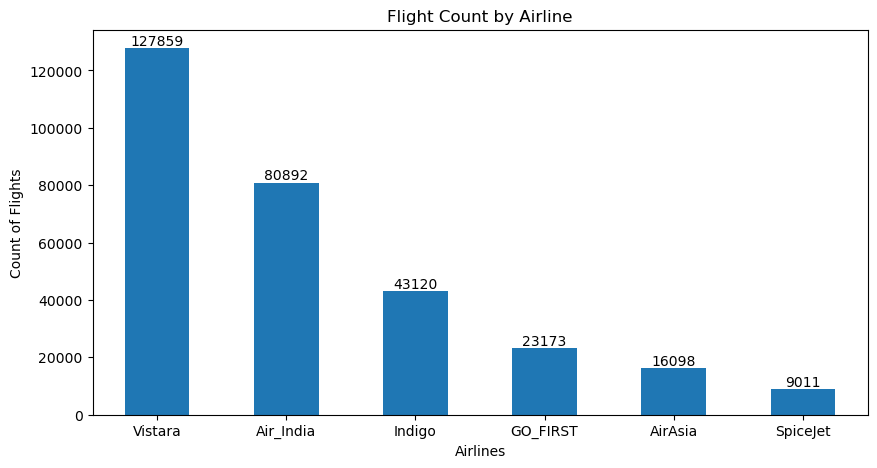

In [8]:
# Show through visualization which airline has the highest number of counts.
import matplotlib.pyplot as plt
counts = df['airline'].value_counts()

plt.figure(figsize=(10, 5))
ax = counts.plot(kind='bar')
plt.xlabel('Airlines')
plt.ylabel('Count of Flights')
plt.title('Flight Count by Airline')
plt.xticks(rotation=0)

# Add count values as text on top of each bar
for i, count in enumerate(counts):
    ax.text(i, count + 1000, str(count), ha='center')

plt.show()

In [9]:
# Grouping the data by 'airline' and 'class' and calculating statistics for price
grouped_by_airline_class =df.groupby(['airline', 'class'])['price'].agg(['mean', 'min', 'max']).reset_index()

# Finding the rows with the highest mean price for each airline
highest_mean_prices = grouped_by_airline_class.groupby('airline').apply(lambda x: x[x['mean'] == x['mean'].max()]).reset_index(drop=True)
print("Class with the highest mean price for each airline:")
print(highest_mean_prices)

Class with the highest mean price for each airline:
     airline     class          mean    min     max
0    AirAsia   Economy   4091.072742   1105   31917
1  Air_India  Business  47131.039212  12000   90970
2   GO_FIRST   Economy   5652.007595   1105   32803
3     Indigo   Economy   5324.216303   1105   31952
4   SpiceJet   Economy   6179.278881   1106   34158
5    Vistara  Business  55477.027777  17604  123071


In [10]:
# Finding the rows with the highest maximum and minimim price for each airline
highest_max_prices = grouped_by_airline_class.groupby('airline').apply(lambda x: x[x['max'] == x['max'].max()]).reset_index(drop=True)
lowest_min_prices = grouped_by_airline_class.groupby('airline').apply(lambda x: x[x['min'] == x['min'].min()]).reset_index(drop=True)
print("\nClass with the highest max price for each airline:")
print(highest_max_prices)

print("\nClass with the lowest min price for each airline:")
print(lowest_min_prices)



Class with the highest max price for each airline:
     airline     class          mean    min     max
0    AirAsia   Economy   4091.072742   1105   31917
1  Air_India  Business  47131.039212  12000   90970
2   GO_FIRST   Economy   5652.007595   1105   32803
3     Indigo   Economy   5324.216303   1105   31952
4   SpiceJet   Economy   6179.278881   1106   34158
5    Vistara  Business  55477.027777  17604  123071

Class with the lowest min price for each airline:
     airline    class         mean   min    max
0    AirAsia  Economy  4091.072742  1105  31917
1  Air_India  Economy  7313.682169  1526  42349
2   GO_FIRST  Economy  5652.007595  1105  32803
3     Indigo  Economy  5324.216303  1105  31952
4   SpiceJet  Economy  6179.278881  1106  34158
5    Vistara  Economy  7806.943645  1714  37646


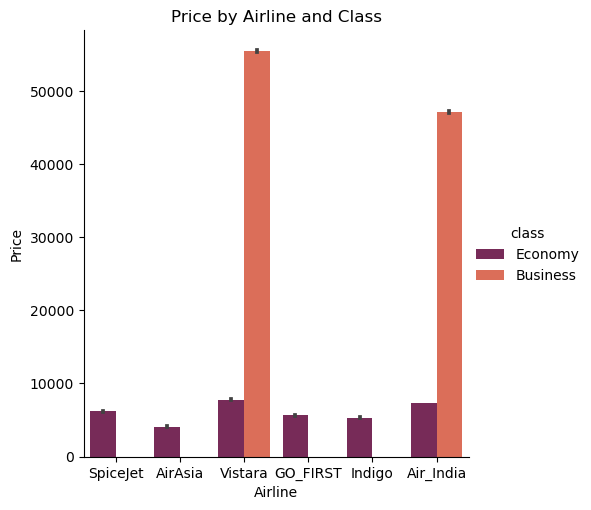

In [11]:
#Through visiualization,plot graph showing varaiation in airlines and classes.
sns.catplot(x='airline', y='price', kind='bar', hue='class', palette='rocket', data=df)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Price by Airline and Class')
plt.show()


In [12]:
#Which airline and class combination offers the lowest total price?
lowest_total_price = df.groupby(['airline', 'class'])['price'].sum().idxmin()
print("Airline with class having lowest total price:", lowest_total_price)

Airline with class having lowest total price: ('SpiceJet', 'Economy')


In [13]:
highest_total_prices = df.groupby(['airline', 'class'])['price'].sum().idxmax()
print("Airline with the highest total prices:", highest_total_prices)

Airline with the highest total prices: ('Vistara', 'Business')


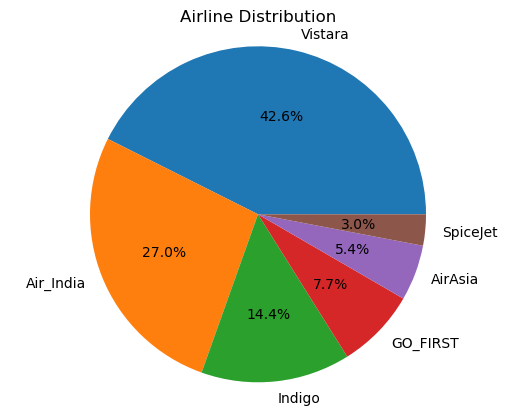

Airline with the highest percentage of flights: Vistara
Airline with the lowest percentage of flights: SpiceJet


In [14]:
#Which airline has the highest percentage of flights in the dataset?
import matplotlib.pyplot as plt

airline_counts = df['airline'].value_counts()
labels = airline_counts.index
counts = airline_counts.values
fig, ax = plt.subplots()
ax.pie(counts, labels=labels, autopct='%2.1f%%', startangle=0)
ax.set_title('Airline Distribution')
ax.axis('equal')
plt.show()


airline_counts = df['airline'].value_counts()
total_flights = len(df)
airline_percentages = airline_counts / total_flights * 100

# Find the airline with the highest and lowest percentage of flights
highest_percentage_airline = airline_percentages.idxmax()
lowest_percentage_airline = airline_percentages.idxmin()
print("Airline with the highest percentage of flights:", highest_percentage_airline)
print("Airline with the lowest percentage of flights:", lowest_percentage_airline)


In [15]:
#Count the number of stops.
stops_count=df.groupby('stops')['airline'].count()
print(stops_count)

stops
one            250863
two_or_more     13286
zero            36004
Name: airline, dtype: int64


In [16]:
#.How does the distribution of airline classes vary across different durations.
class_distribution = df.groupby('duration')['class'].value_counts()
print(class_distribution)


#.Which classes are associated with the longest and shortest durations
longest_duration_classes = df['class'].index.max()
print("Airline classes for the longest duration:",longest_duration_classes)
shortest_duration_classes = df['class'].index.min()
print("Airline classes for the shortest duration:",shortest_duration_classes)


duration  class   
0.83      Economy      52
0.92      Economy      78
1.00      Economy     375
          Business      2
1.08      Economy     551
                     ... 
45.83     Business      1
47.08     Economy       1
47.75     Business      1
          Economy       1
49.83     Economy       2
Name: class, Length: 849, dtype: int64
Airline classes for the longest duration: 300152
Airline classes for the shortest duration: 0


airline
AirAsia      27.735184
Air_India    25.497466
GO_FIRST     27.430415
Indigo       26.264309
SpiceJet     24.122850
Vistara      25.894532
Name: days_left, dtype: float64


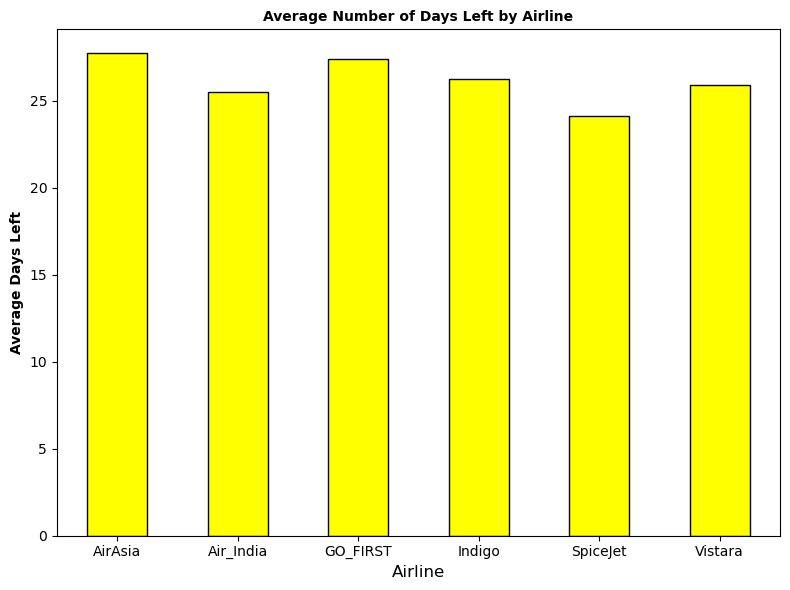

In [17]:
#.What is the average number of days left for booking a flight from each airline
average_days_left = df.groupby('airline')['days_left'].mean()
print(average_days_left)


import matplotlib.pyplot as plt

average_days_left = df.groupby('airline')['days_left'].mean()
plt.figure(figsize=(8, 6))
average_days_left.plot(kind='bar', color='yellow', edgecolor='black')

plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Days Left', fontsize=10, fontweight='bold')
plt.title('Average Number of Days Left by Airline', fontsize=10, fontweight='bold')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [18]:
#.Which airline offers the maximum number of days left for booking a flight?
max_days_left_for_booking_airline = df[df['days_left'] == df['days_left'].max()]['airline'].values[0]
print("The airline offering the maximum days left for booking is",  max_days_left_for_booking_airline)

The airline offering the maximum days left for booking is Vistara


In [19]:
#.Which range of days left has the highest and lowest average prices? 
average_price = df.groupby(['days_left','airline'])['price'].count()
print(average_price)


days_left  airline  
1          AirAsia        83
           Air_India     560
           GO_FIRST       80
           Indigo        417
           SpiceJet       69
                        ... 
49         Air_India    1542
           GO_FIRST      432
           Indigo        964
           SpiceJet      144
           Vistara      2689
Name: price, Length: 294, dtype: int64


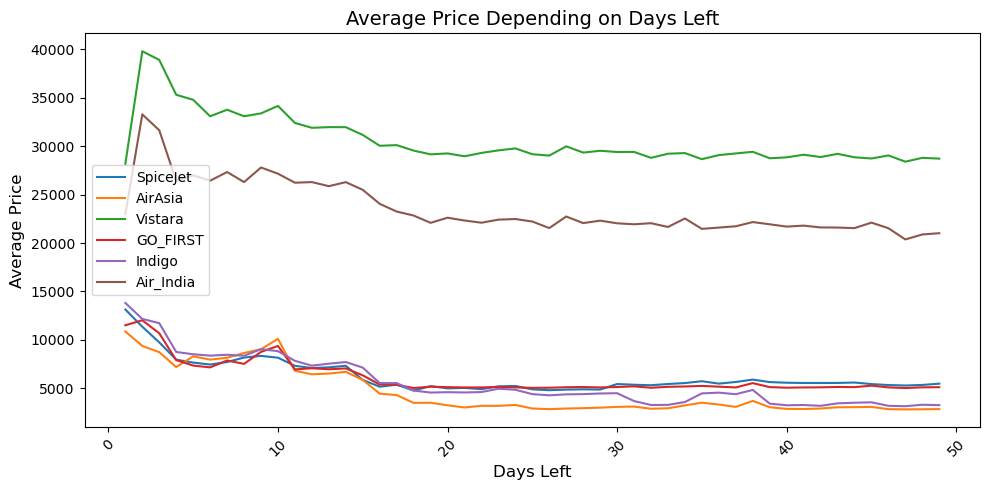

In [20]:
#.Which airlines tend to offer better deals for last-minute bookings, and which ones are more consistent in their pricing?
import matplotlib.pyplot as plt

average_price = df.groupby(['airline', 'days_left'])['price'].mean()

plt.figure(figsize=(10, 5))
for airline in df['airline'].unique():
    data = average_price[airline]
    plt.plot(data.index.get_level_values('days_left'), data.values, label=airline)

plt.xlabel('Days Left', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Average Price Depending on Days Left', fontsize=14)

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


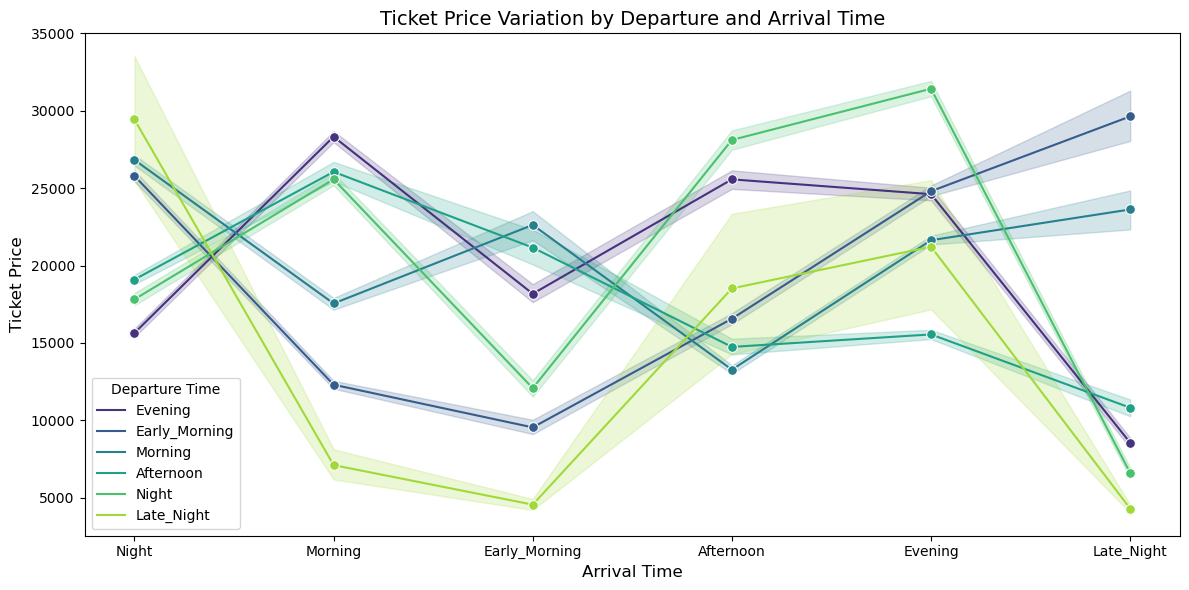

In [21]:
#. Does ticket price change based on the departure time and arrival time?

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(x='arrival_time', y='price', hue='departure_time', data=df, marker='o', markersize=7, palette='viridis')

plt.xlabel('Arrival Time', fontsize=12)
plt.ylabel('Ticket Price', fontsize=12)
plt.title('Ticket Price Variation by Departure and Arrival Time', fontsize=14)
plt.legend(title='Departure Time', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

   source_city destination_city  flight count
0    Bangalore          Chennai          6410
1    Bangalore            Delhi         13756
2    Bangalore        Hyderabad          8928
3    Bangalore          Kolkata         10028
4    Bangalore           Mumbai         12939
5      Chennai        Bangalore          6493
6      Chennai            Delhi          9783
7      Chennai        Hyderabad          6103
8      Chennai          Kolkata          6983
9      Chennai           Mumbai          9338
10       Delhi        Bangalore         14012
11       Delhi          Chennai         10780
12       Delhi        Hyderabad          9328
13       Delhi          Kolkata         11934
14       Delhi           Mumbai         15289
15   Hyderabad        Bangalore          7854
16   Hyderabad          Chennai          6395
17   Hyderabad            Delhi          8506
18   Hyderabad          Kolkata          7987
19   Hyderabad           Mumbai         10064
20     Kolkata        Bangalore   

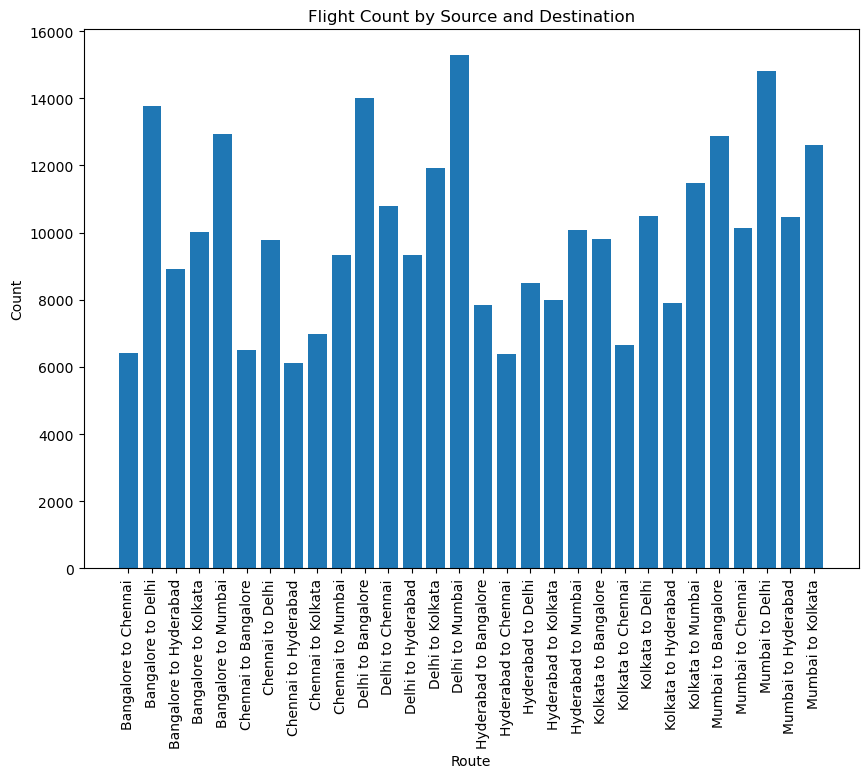

In [22]:
# Which cities have the most outbound and inbound flights?
counts = df.groupby(['source_city', 'destination_city']).size().reset_index(name='flight count')
print(counts)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.bar(counts['source_city'] + ' to ' + counts['destination_city'], counts['flight count'])
plt.xticks(rotation=90)
plt.xlabel('Route')
plt.ylabel('Count')
plt.title('Flight Count by Source and Destination')
plt.show()



In [23]:
#.What are the top five most frequently flown routes? 
route_counts = df.groupby(['source_city', 'destination_city']).size().reset_index(name='flight_count')

# Sorting the routes in descending order based on flight_count
sorted_routes = route_counts.sort_values(by='flight_count', ascending=False)
top_five_routes = sorted_routes.head(5)
print("Top five most frequently flown routes:")
print(top_five_routes)


Top five most frequently flown routes:
   source_city destination_city  flight_count
14       Delhi           Mumbai         15289
27      Mumbai            Delhi         14809
10       Delhi        Bangalore         14012
1    Bangalore            Delhi         13756
4    Bangalore           Mumbai         12939


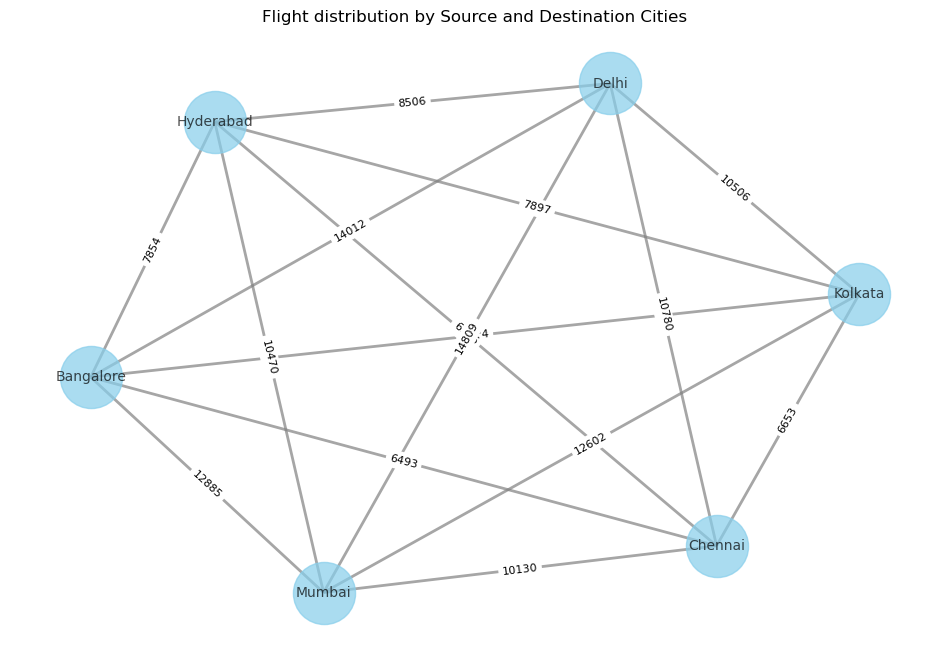

In [24]:
#.What are the shortest and longest flight routes in terms of the number of connecting cities? 
import networkx as nx
import matplotlib.pyplot as plt

edges_df = counts[['source_city', 'destination_city']].copy()
edges_df.columns = ['source', 'target']
edges_df['flight_count'] = counts['flight count']

# Create the network graph
G = nx.from_pandas_edgelist(edges_df, 'source', 'target', edge_attr='flight_count')

# Plot the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, edge_color='gray', width=2, alpha=0.7)
edge_labels = nx.get_edge_attributes(G, 'flight_count')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title('Flight distribution by Source and Destination Cities')
plt.axis('off')
plt.show()


destination_city     Bangalore       Chennai         Delhi     Hyderabad  \
source_city                                                                
Bangalore                  NaN  23321.850078  17723.313972  21226.121192   
Chennai           25081.850454           NaN  18981.863948  21591.345404   
Delhi             17880.216315  19369.881354           NaN  17347.288379   
Hyderabad         21347.177998  21848.065989  17243.945685           NaN   
Kolkata           22744.808428  23660.361040  19422.354559  21500.011397   
Mumbai            23147.873807  22781.899112  18725.320008  21004.046705   

destination_city       Kolkata        Mumbai  
source_city                                   
Bangalore         23500.061229  23128.618672  
Chennai           22669.932407  22765.849647  
Delhi             20566.409418  19355.829812  
Hyderabad         20823.893201  20080.865759  
Kolkata                    NaN  22078.883579  
Mumbai            22379.146723           NaN  


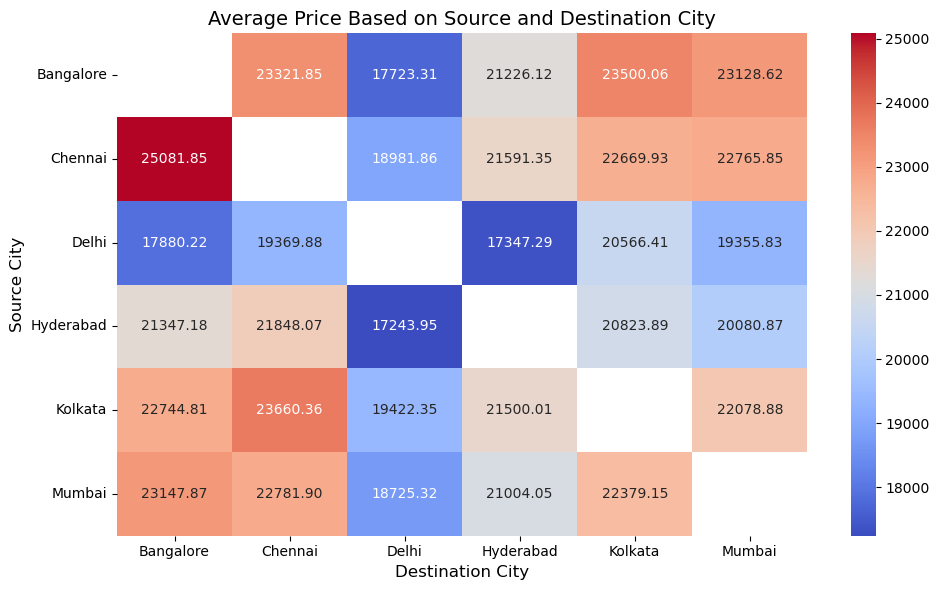

In [25]:
# How does city or distance affect prices?

average_price = df.groupby(['source_city', 'destination_city'])['price'].mean()
average_price = average_price.unstack()
print(average_price)


import seaborn as sns
import matplotlib.pyplot as plt

average_price = df.groupby(['source_city', 'destination_city'])['price'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(average_price, cmap='coolwarm', annot=True, fmt='.2f')

plt.title('Average Price Based on Source and Destination City', fontsize=14)
plt.xlabel('Destination City', fontsize=12)
plt.ylabel('Source City', fontsize=12)

plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()